# Amazon electronics review

<img src = https://keywordtoolio-blog.s3.amazonaws.com/wp-content/uploads/2019/06/12130641/Amazon-A9-Product-Images.jpg>

# Introduction

- ### The main goal of this project to analysis the reviews of the customer given to the particular product 
- ### Here in this project mainly electronics and phone accessories were analyized.
- ### Dataset is taken from the stanford website and link is below
- ### [dataset_link](http://snap.stanford.edu/data/web-Amazon-links.html)
- ### 'NLTK library' is used for removing the stop words and 'wordcloud library' is used to visualize the most frequently used words

# Analysis Part-I

In [1]:
# importing the libraries
import pandas as pd
import re
import nltk

In [ ]:
# viewing the schema of the data
with open('cellphones/cell.txt') as f:
    contents = f.read()
    print(contents)

## Reading the data

In [3]:
cell_ = pd.read_csv("cellphones/cell.txt", sep='delimiter', header=None, engine = 'python')
print(len(cell_))
cell_.head()

789300


,0
0,product/productId: B000JVER7W
1,product/title: Mobile Action MA730 Handset Man...
2,product/price: unknown
3,review/userId: A1RXYH9ROBAKEZ
4,review/profileName: A. Igoe


In [4]:
# changing the column name
cell_.columns = ['First']
cell_.head()

,First
0,product/productId: B000JVER7W
1,product/title: Mobile Action MA730 Handset Man...
2,product/price: unknown
3,review/userId: A1RXYH9ROBAKEZ
4,review/profileName: A. Igoe


## Spliting the data into two columns

In [5]:
review = cell_.First.str.split(":", expand= True).dropna(axis = 1)
review.loc[0:9]

,0,1
0,product/productId,B000JVER7W
1,product/title,Mobile Action MA730 Handset Manager - Bluetoo...
2,product/price,unknown
3,review/userId,A1RXYH9ROBAKEZ
4,review/profileName,A. Igoe
5,review/helpfulness,0/0
6,review/score,1.0
7,review/time,1233360000
8,review/summary,Don't buy!
9,review/text,"First of all, the company took my money and s..."


In [6]:
# Transposing the data
review.set_index(0, inplace = True)
review.iloc[10:20].T

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Sof...,Great product- tried others and this is a ten...


## Creating an empty data frame with zero values

In [7]:
import numpy as np
dat = np.zeros((1,10))
c1 = pd.DataFrame(dat, dtype = str )
c1.columns = ["product/productId", "product/title", "product/price", "review/userId", "review/profileName", "review/helpfulness", "review/score", "review/time"	, "review/summary", "review/text"]
c1

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Transposing the data
k = review.iloc[0:10].T
c2 = pd.merge(left= c1, right= k, how = 'outer')
c2

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and s..."


## Creating a exact dataset format for the further analysis

In [9]:
i = 10
while i < len(review):
    df = review.iloc[i:10+i].T
    #e = pd.concat([c2,df])
    c2 = c2.append(df, ignore_index= False)
    i+=10
c2

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and s..."
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Sof...,Great product- tried others and this is a ten...
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up......
1,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4...
...,...,...,...,...,...,...,...,...,...,...
1,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - D...,unknown,A2GO73D6XKOJ9H,I. Vidyakin,9/9,4.0,1158710400,"great sound quality, good battery life, avera...",I got this headset because I like the SonyEri...
1,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - D...,unknown,A1DYNKV8KPEPTQ,S. Pandya,2/2,4.0,1160784000,Excellent quality at an affordable price,I have owned this product for over two weeks ...
1,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - D...,unknown,A2J6UIA8QP0QX5,T. Andrews,0/0,5.0,1173744000,Sony Ericsson Bluetooth HBH-PV700 Headset - D...,I bought this item for my husband. He really ...
1,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - D...,unknown,A2DP6EPPQAIL3C,David M. Cantrell,0/0,5.0,1171584000,"works great, competitively priced",I bought this item after I shopped in the loc...


In [10]:
# dropping the row 0
data_ = c2.drop(0)

In [11]:
# reseting the index and changing the column names
data_.reset_index(drop = True, inplace= True)
data_.columns = ["productId", "product_title", "price", "userId", "profileName", "helpfulness", "score", "time", "summary", "text"]
data_

,productId,product_title,price,userId,profileName,helpfulness,score,time,summary,text
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A1RXYH9ROBAKEZ,A. Igoe,0/0,1.0,1233360000,Don't buy!,"First of all, the company took my money and s..."
1,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Sof...,Great product- tried others and this is a ten...
2,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoo...,unknown,A2NOQQ7I6PU7CW,"Daniel M. Johnson ""rocknbluesharp""",0/0,4.0,1186704000,good,works real good....a little hard to set up......
3,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,A29Q0CLOF0U8BN,E. Owens,4/5,4.0,1146182400,No instructions included...,The price was right for this cable ($11.95+$4...
4,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, ...",unknown,ANNHJND2MHUI3,"Isaac Salas ""=CRBF=gB^link""",0/0,1.0,1173657600,NOT A DATA CABLE,this is NOT a DATA CABLE this is only a USB c...
...,...,...,...,...,...,...,...,...,...,...
78925,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - D...,unknown,A2GO73D6XKOJ9H,I. Vidyakin,9/9,4.0,1158710400,"great sound quality, good battery life, avera...",I got this headset because I like the SonyEri...
78926,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - D...,unknown,A1DYNKV8KPEPTQ,S. Pandya,2/2,4.0,1160784000,Excellent quality at an affordable price,I have owned this product for over two weeks ...
78927,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - D...,unknown,A2J6UIA8QP0QX5,T. Andrews,0/0,5.0,1173744000,Sony Ericsson Bluetooth HBH-PV700 Headset - D...,I bought this item for my husband. He really ...
78928,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - D...,unknown,A2DP6EPPQAIL3C,David M. Cantrell,0/0,5.0,1171584000,"works great, competitively priced",I bought this item after I shopped in the loc...


In [12]:
data_['score'][0]

' 1.0'

## Descriptive statistics of score column

In [13]:
data_.score.describe()

count     78930
unique        5
top         5.0
freq      30253
Name: score, dtype: object

## Information about the data

In [14]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78930 entries, 0 to 78929
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productId      78930 non-null  object
 1   product_title  78930 non-null  object
 2   price          78930 non-null  object
 3   userId         78930 non-null  object
 4   profileName    78930 non-null  object
 5   helpfulness    78930 non-null  object
 6   score          78930 non-null  object
 7   time           78930 non-null  object
 8   summary        78930 non-null  object
 9   text           78930 non-null  object
dtypes: object(10)
memory usage: 6.0+ MB


## Removing extra space infront of values in the columns 

In [ ]:
data_['productId'] = data_.productId.str.lstrip()
data_['product_title'] = data_.product_title.str.lstrip() 
data_['price'] = data_.price.str.lstrip()
data_['userId'] = data_.userId.str.lstrip()
data_['profileName'] = data_.profileName.str.lstrip()
data_['helpfulness'] = data_.helpfulness.str.lstrip()
data_['time'] = data_.time.str.lstrip()
data_['text'] = data_.text.str.lstrip()
data_['summary'] = data_.summary.str.lstrip()
data_['score'] = data_.score.str.lstrip()

## Converting the data type of the score to 'float' from 'object'

In [16]:
data_['score'] = data_['score'].astype(float)

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_7968/2754233822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['score'] = data_['score'].astype(float)


In [17]:
data_['score'][0]

1.0

In [18]:
# finding the count values of each score
indexs = []
for i in range(1,6):
    indexs.append(len(data_[(data_['score'] == float(i))]))
    
indexs

[14675, 7566, 8719, 17717, 30253]

In [19]:
# creating the simple dataframe for visualization
scores = [1.0 , 2.0, 3.0, 4.0, 5.0]
df = pd.DataFrame(data= [scores, indexs]).T
df.columns = ['Score', 'Total_Count']
df

,Score,Total_Count
0,1.0,14675.0
1,2.0,7566.0
2,3.0,8719.0
3,4.0,17717.0
4,5.0,30253.0


## Visualizing the scores 

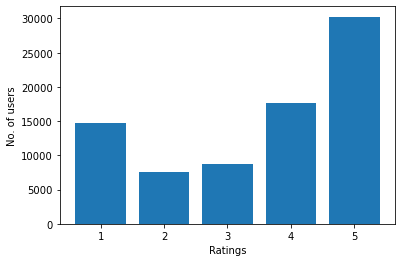

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.axes() # as per book
ax.bar(df.Score, df.Total_Count)
ax.set(xlabel = 'Ratings', ylabel = 'No. of users')
plt.show()

# Analysis Part-II

## Analyzing the data with 5 star rating

In [144]:
five_star = data_[data_['score'] == 5.0]

In [145]:
# reseting the index
five_star.reset_index(drop = True, inplace= True)
print(five_star.shape)
five_star.head()

(30253, 10)


,productId,product_title,price,userId,profileName,helpfulness,score,time,summary,text
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...
1,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A254KU5H615J3N,J. S. Gaviota,0/0,5.0,1142467200,Excellent product!,"I have a Sony Ericsson K700i, which doesn't se..."
2,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A1RA376HUG2LGD,"J. Baker ""Sunny""",1/3,5.0,1134518400,A must have product at low price!,This cable saves me a lot of money. I don't ne...
3,B000F1UQJY,Motorola HT820 Stereo Bluetooth Headset with m...,unknown,AYAXWDXO97UKG,J. Tomlinson,0/0,5.0,1345161600,Gold Standard,I've gone through many different bluetooth hea...
4,B000F1UQJY,Motorola HT820 Stereo Bluetooth Headset with m...,unknown,A1LVXNYOHKMCHK,"John Anetrella ""esse est percipi""",0/0,5.0,1316476800,Old skewl,Review is a few years late. Worked great when ...


## creating a new column with summary and converting it to lower for further analysis

In [146]:
five_star['text_analysis'] = five_star['summary'].str.lower()
five_star['text_analysis']

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_7968/3387603910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_star['text_analysis'] = five_star['summary'].str.lower()


0        mobile action bluetooth mobile phone tool soft...
1                                       excellent product!
2                        a must have product at low price!
3                                            gold standard
4                                                old skewl
                               ...                        
30248                    excellent service! excellent site
30249                  samsung t-mobile t219 prepaid phone
30250    sony ericsson bluetooth hbh-pv700 headset - dp...
30251                    works great, competitively priced
30252            sony ericsson bluetooth hbh-pv700 headset
Name: text_analysis, Length: 30253, dtype: object

In [147]:
five_star['text_analysis'][30252]

'sony ericsson bluetooth hbh-pv700 headset'

## Removing all the special characters and numbers from 'text_analysis' column

In [148]:
import re
five_star['text_analysis'] = five_star['text_analysis'].str.replace("[^a-zA-Z]", " ")
five_star.tail()

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_7968/182630069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_star['text_analysis'] = five_star['text_analysis'].str.replace("[^a-zA-Z]", " ")


,productId,product_title,price,userId,profileName,helpfulness,score,time,summary,text,text_analysis
30248,B0003RA29O,Motorola A630 Phone (T-Mobile),unknown,A236RH4W93K55I,"Jihad H. Beydoun ""JB""",5/33,5.0,1110240000,Excellent Service! Excellent site,THank you Amazon.com for your excellent servic...,excellent service excellent site
30249,B000OGSGLU,Samsung t219 TMO to Go Prepaid Phone (T-Mobile),unknown,ASTJDCWE5RNRR,"Babe ""Dmeanybean""",2/2,5.0,1213401600,SAMSUNG T-MOBILE T219 PREPAID PHONE,This is my first cell phone. I only needed som...,samsung t mobile t prepaid phone
30250,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2J6UIA8QP0QX5,T. Andrews,0/0,5.0,1173744000,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,I bought this item for my husband. He really l...,sony ericsson bluetooth hbh pv headset dp...
30251,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2DP6EPPQAIL3C,David M. Cantrell,0/0,5.0,1171584000,"works great, competitively priced",I bought this item after I shopped in the loca...,works great competitively priced
30252,B000EG4MGI,Sony Ericsson Bluetooth HBH-PV700 Headset - DP...,unknown,A2J1D5U6IYWPGJ,Daisy M. Ledford,0/0,5.0,1168819200,Sony Ericsson Bluetooth HBH-PV700 Headset,"I have tried a number of bluetooth earpieces, ...",sony ericsson bluetooth hbh pv headset


## creating a new column as category

In [149]:
five_star['category'] = five_star.loc[:, 'product_title']

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_7968/1784153632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_star['category'] = five_star.loc[:, 'product_title']


In [150]:
# converting into the lower case
five_star['category'] = five_star['category'].str.lower()

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_7968/1819318835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_star['category'] = five_star['category'].str.lower()


## Removing all numbers and special characters

In [151]:
five_star['category'] = five_star['category'].str.replace("[^a-zA-z]", " ")

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_7968/655091692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_star['category'] = five_star['category'].str.replace("[^a-zA-z]", " ")


In [152]:
five_star['category']

0        mobile action ma    handset manager   bluetoot...
1        usb data cable for sony ericsson z     z     z...
2        usb data cable for sony ericsson z     z     z...
3        motorola ht    stereo bluetooth headset with m...
4        motorola ht    stereo bluetooth headset with m...
                               ...                        
30248                       motorola a    phone  t mobile 
30249      samsung t    tmo to go prepaid phone  t mobile 
30250    sony ericsson bluetooth hbh pv    headset   dp...
30251    sony ericsson bluetooth hbh pv    headset   dp...
30252    sony ericsson bluetooth hbh pv    headset   dp...
Name: category, Length: 30253, dtype: object

## Categorizing the products into individual categories

In [153]:
# list with all categories
li = ['Bluetooth Data Suite', 'Battery', 'Screen Protector', 'pouch', 'USB Data Cable', 'Ear Plug', 'Wireless', 'Bluetooth Keyboard', 'Bluetooth Music Adaptor',
        'Bluetooth Headset', 'SHIELD','Leather Case', 'Charger', 'CELL PHONE','Desktop','Phones','EarGels', '(Verizon Wireless)', 'Headset', 'Bluetooth Wireless Phones Headset',
        'PSP','Starter Kit','Charge','Cable','Desk Stand','Multidapt','AC Wall Adapter','Adapter','Stylus', 'Lith Bat', 'Speaker', 'stereo', 'handstands', 'car kit',
        'Holster','Travel Charger','charger','RadioPlay','Cover','headset','mobile','case','phone', 'Antenna Repeater', 'pen']

li_ = [x.lower() for x in li]

In [154]:
# function to check any matching words from above list
def str_(x):
    xt = []
    for i in range(len(li_)):
        if (x.__contains__(li_[i])) == True:
            xt.append(li_[i])
            break
    return xt

In [155]:
five_star['category'][30248]  

'motorola a    phone  t mobile '

In [156]:
t1 = five_star['category'].apply(str_)
t1.head()

0    [bluetooth data suite]
1          [usb data cable]
2          [usb data cable]
3                [wireless]
4                [wireless]
Name: category, dtype: object

## Descriptive statistics 

In [157]:
t1.describe()

count                   30253
unique                     39
top       [bluetooth headset]
freq                     5171
Name: category, dtype: object

In [158]:
five_star['category'][14248]

'motorola hf    easy install bluetooth car kit [motorola retail packaging]'

In [159]:
# reassigning the t1 to the category column
five_star['category'] = t1

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_7968/3639003821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_star['category'] = t1


In [160]:
five_star['category']

0        [bluetooth data suite]
1              [usb data cable]
2              [usb data cable]
3                    [wireless]
4                    [wireless]
                  ...          
30248                  [mobile]
30249                  [mobile]
30250                 [headset]
30251                 [headset]
30252                 [headset]
Name: category, Length: 30253, dtype: object

In [161]:
# assigning the data from the nested list
five_star['category'] = five_star['category'].str.get(0)

C:\Users\Nikhi\AppData\Local\Temp/ipykernel_7968/1204468014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_star['category'] = five_star['category'].str.get(0)


In [162]:
five_star.head()

,productId,product_title,price,userId,profileName,helpfulness,score,time,summary,text,text_analysis,category
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...,mobile action bluetooth mobile phone tool soft...,bluetooth data suite
1,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A254KU5H615J3N,J. S. Gaviota,0/0,5.0,1142467200,Excellent product!,"I have a Sony Ericsson K700i, which doesn't se...",excellent product,usb data cable
2,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A1RA376HUG2LGD,"J. Baker ""Sunny""",1/3,5.0,1134518400,A must have product at low price!,This cable saves me a lot of money. I don't ne...,a must have product at low price,usb data cable
3,B000F1UQJY,Motorola HT820 Stereo Bluetooth Headset with m...,unknown,AYAXWDXO97UKG,J. Tomlinson,0/0,5.0,1345161600,Gold Standard,I've gone through many different bluetooth hea...,gold standard,wireless
4,B000F1UQJY,Motorola HT820 Stereo Bluetooth Headset with m...,unknown,A1LVXNYOHKMCHK,"John Anetrella ""esse est percipi""",0/0,5.0,1316476800,Old skewl,Review is a few years late. Worked great when ...,old skewl,wireless


## Replacing and joining multiple categories with unique categories

In [163]:
vals_to_replace = {'bluetooth Wireless Phones Headset':'bluetooth headset', 'headset': 'bluetooth headset', 'pen': 'stylus', 'cell phone':'phone',
                    'leather case':'case', 'pouch':'case','multidapt':'adpater', 'ac wall adapter': 'adapter', 'lith bat':'battery', 'mobile':'phone', 
                    'shield':'case', 'charge':'charger', 'handstands':'stand', 'desk stand':'stand', 'ear plug':'bluetoooth headset',
                    'wireless': 'bluetooth headset', 'cover':'case', 'stereo':'speaker'}

In [165]:
five_star = five_star.replace({'category': {'bluetooth Wireless Phones Headset':'bluetooth headset', 'pen': 'stylus', 'cell phone':'phone',
                    'leather case':'case', 'pouch':'case','multidapt':'adapter', 'ac wall adapter': 'adapter', 'lith bat':'battery', 'mobile':'phone', 
                    'shield':'case', 'charge':'charging device', 'charger': 'charging device', 'handstands':'stand', 'desk stand':'stand', 'ear plug':'bluetoooth headset', 'travel charger':'charging device',
                    'wireless': 'bluetooth headset', 'cover':'case', 'stereo':'speaker', 'usb data cable':'cable'}}, regex = True)

In [166]:
five_star['category'].describe()

count                 28422
unique                   26
top       bluetooth headset
freq                   7217
Name: category, dtype: object

# Analysis part-III

# Removing the stop words from strings in python (nltk, genism, spacy)

- Stop words are those words in natural language that have a very little meaning, such as "is", "an", "the", etc. Search engines and other enterprise indexing platforms often filter the stop words while fetching results from the database against the user queries.

- Stop words are often removed from the text before training deep learning and machine learning models since stop words occur in abundance, hence providing little to no unique information that can be used for classification or clustering.

- spacy can be used to different language but we need to mention the desired language

- [for_more_info](https://stackabuse.com/removing-stop-words-from-strings-in-python/)

    - Nltk stop words - ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    
    - "word_tokenize" is used to divide the text into the words

In [167]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [168]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
testing_ = five_star['text_analysis']

## Adding additional stopwords to default list

In [170]:
all_stopwords = stopwords.words('english')
all_stopwords.extend(['ma','this'])

In [171]:
# tokenizing the words
test_ = []
for i in testing_:
   text_tokens = word_tokenize(i, language = "english")
   tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
   test_.append(tokens_without_sw)
test_[0:5]

[['mobile', 'action', 'bluetooth', 'mobile', 'phone', 'tool', 'software'],
 ['excellent', 'product'],
 ['must', 'product', 'low', 'price'],
 ['gold', 'standard'],
 ['old', 'skewl']]

In [172]:
# now combine all the words into a single sentence by using the 'join' function

for i in range(len(test_)):
    test_[i] = " ".join(test_[i]) #here this part of the code will join all the words together

five_star['text_analysis'] = test_
five_star.head()

,productId,product_title,price,userId,profileName,helpfulness,score,time,summary,text,text_analysis,category
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...,mobile action bluetooth mobile phone tool soft...,bluetooth data suite
1,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A254KU5H615J3N,J. S. Gaviota,0/0,5.0,1142467200,Excellent product!,"I have a Sony Ericsson K700i, which doesn't se...",excellent product,cable
2,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A1RA376HUG2LGD,"J. Baker ""Sunny""",1/3,5.0,1134518400,A must have product at low price!,This cable saves me a lot of money. I don't ne...,must product low price,cable
3,B000F1UQJY,Motorola HT820 Stereo Bluetooth Headset with m...,unknown,AYAXWDXO97UKG,J. Tomlinson,0/0,5.0,1345161600,Gold Standard,I've gone through many different bluetooth hea...,gold standard,bluetooth headset
4,B000F1UQJY,Motorola HT820 Stereo Bluetooth Headset with m...,unknown,A1LVXNYOHKMCHK,"John Anetrella ""esse est percipi""",0/0,5.0,1316476800,Old skewl,Review is a few years late. Worked great when ...,old skewl,bluetooth headset


# Most frequent words are displayed together

    - for visualing the word we need to install 'wordcloud' first and then we need to import it

In [173]:
!pip install WordCloud

# Visualizing the most frequently words

- [Interpolation_types]("https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html")
- Investors use interpolation to create new estimated data points between known data points on a chart
- [more_info]("https://www.investopedia.com/terms/i/interpolation.asp")
- random_state as the name suggests, is used for initializing the internal random number generator
    - which will decide the splitting of data into train and test indices in your case
    - interpolation - Interpolation is a method of creating new data points within the range of known data points (bilinear, bicubic, blackman)



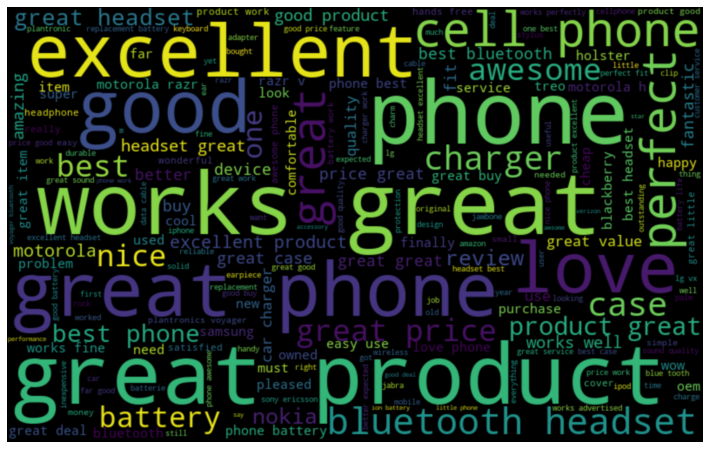

In [174]:
# bicubic interpolation

all_words = " ".join([sentence for sentence in five_star['text_analysis']])   #it is big string consisting of all words together

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = None, max_font_size = 100).generate(all_words)

# plot the graphs
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'bicubic')
plt.axis('off')
plt.show()

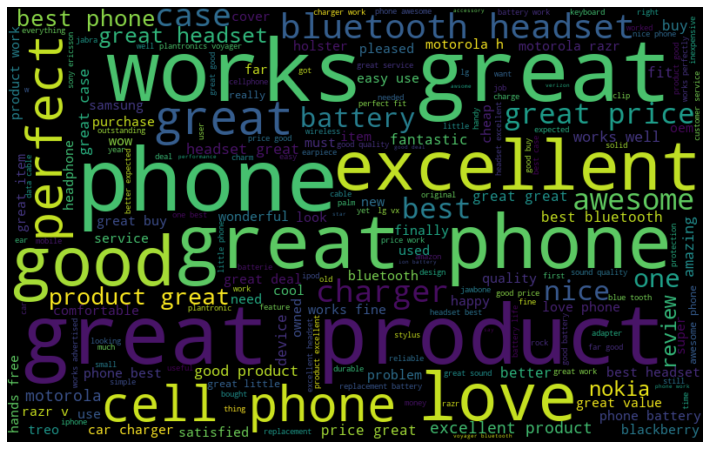

In [175]:
# bilinear interpolation

all_words = " ".join([sentence for sentence in five_star['text_analysis']])   #it is big string consisting of all words together

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = None, max_font_size = 100).generate(all_words)

# plot the graphs
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

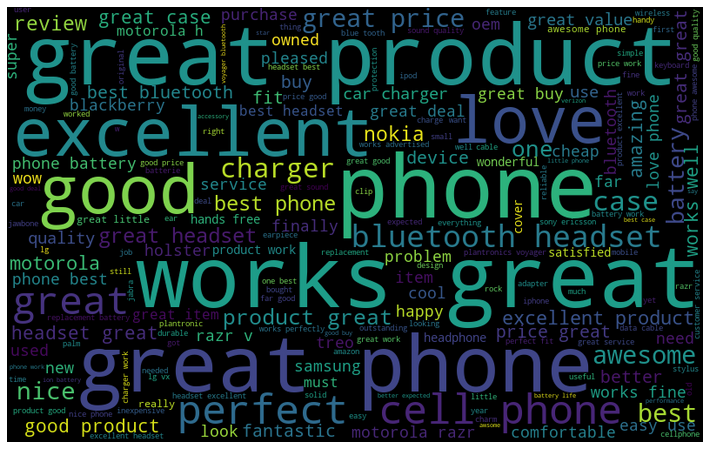

In [176]:
# blackman interpolation

all_words = " ".join([sentence for sentence in five_star['text_analysis']])   #it is big string consisting of all words together

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = None, max_font_size = 100).generate(all_words)

# plot the graphs
plt.figure(figsize = (15,8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

In [177]:
five_star.head()

,productId,product_title,price,userId,profileName,helpfulness,score,time,summary,text,text_analysis,category
0,B000JVER7W,Mobile Action MA730 Handset Manager - Bluetoot...,unknown,A7L6E1KSJTAJ6,Steven Martz,0/0,5.0,1191456000,Mobile Action Bluetooth Mobile Phone Tool Soft...,Great product- tried others and this is a ten ...,mobile action bluetooth mobile phone tool soft...,bluetooth data suite
1,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A254KU5H615J3N,J. S. Gaviota,0/0,5.0,1142467200,Excellent product!,"I have a Sony Ericsson K700i, which doesn't se...",excellent product,cable
2,B000924R5I,"USB Data Cable for Sony-Ericsson Z600, Z500, Z...",unknown,A1RA376HUG2LGD,"J. Baker ""Sunny""",1/3,5.0,1134518400,A must have product at low price!,This cable saves me a lot of money. I don't ne...,must product low price,cable
3,B000F1UQJY,Motorola HT820 Stereo Bluetooth Headset with m...,unknown,AYAXWDXO97UKG,J. Tomlinson,0/0,5.0,1345161600,Gold Standard,I've gone through many different bluetooth hea...,gold standard,bluetooth headset
4,B000F1UQJY,Motorola HT820 Stereo Bluetooth Headset with m...,unknown,A1LVXNYOHKMCHK,"John Anetrella ""esse est percipi""",0/0,5.0,1316476800,Old skewl,Review is a few years late. Worked great when ...,old skewl,bluetooth headset


## categories with the total values

In [178]:
five_star['category'].value_counts()

bluetooth headset          7217
phone                      5491
battery                    3266
case                       2672
charging devicer           2473
headset                    1472
phones                     1370
cable                      1118
speaker                     864
adapter                     645
holster                     591
stylus                      252
screen protector            206
bluetooth keyboard          166
radioplay                   166
eargels                      92
car kit                      89
charging device              83
bluetooth music adaptor      52
desktop                      47
stand                        42
antenna repeater             17
starter kit                  16
bluetoooth headset            9
psp                           5
bluetooth data suite          1
Name: category, dtype: int64

# Conculsion:

- ## In this dataset 5 star is highest ratings given to the products.
- ## NLTK, RE libraries are used for removing the numbers and stopwords.
- ## Finally, wordcloud library is used for the visualing the most common from the ratings.
- ## Here, bicubic, bilinear, blackman interpolation has been used.
- ## great, phone, excellent, product, pleased are most common words used in the ratings.